# Model Selection

From the previous performace and testing process, we came to the conclusion that Stacking Classifier with selected features (set number 2) is giving best performance.

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb

In [2]:
data = pd.read_csv('dataset_2.csv')

In [3]:
target = data['Label']
features = data.drop(['Label'], axis=1)

In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [7]:
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
ab_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
gnb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [8]:
# Making predictions
lr_pred = lr_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
ab_pred = ab_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
gnb_pred = gnb_model.predict(X_test_scaled)

In [9]:
# Evaluating the models
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [10]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.8095
Decision Tree Accuracy: 0.7715
Random Forest Accuracy: 0.8155
Logistic Regression Accuracy: 0.703
Gradient Boosting Accuracy: 0.7785
AdaBoost Accuracy: 0.7595
SVM Accuracy: 0.709
KNN Accuracy: 0.7865
GaussianNB Accuracy: 0.6645


In [11]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.799 (0.013)


In [12]:
## stacking algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split


estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=20)),
    ('xgb', xgb.XGBClassifier()),
    ('knn', make_pipeline(MinMaxScaler(), KNeighborsClassifier()))
]

stacking_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

stacking_model.fit(X_train_scaled, y_train)

stacking_pred = stacking_model.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Stacking Classifier Accuracy: 0.82


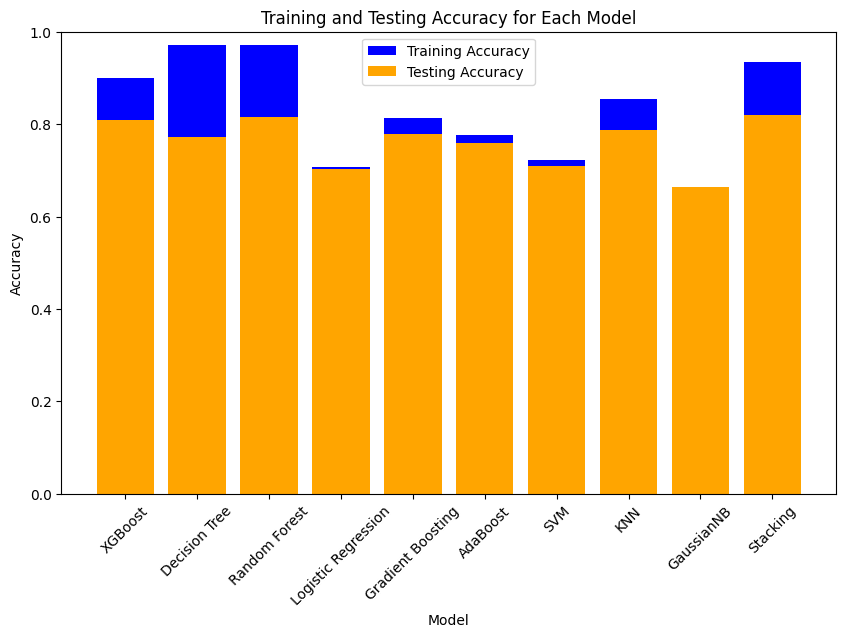

In [13]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB', 'Stacking']
train_accuracies = [xgb_model.score(X_train_scaled, y_train), dt_model.score(X_train_scaled, y_train), rf_model.score(X_train_scaled, y_train), lr_model.score(X_train_scaled, y_train), gb_model.score(X_train_scaled, y_train), ab_model.score(X_train_scaled, y_train), svm_model.score(X_train_scaled, y_train), knn_model.score(X_train_scaled, y_train), gnb_model.score(X_train_scaled, y_train), stacking_model.score(X_train_scaled, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy, stacking_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='blue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

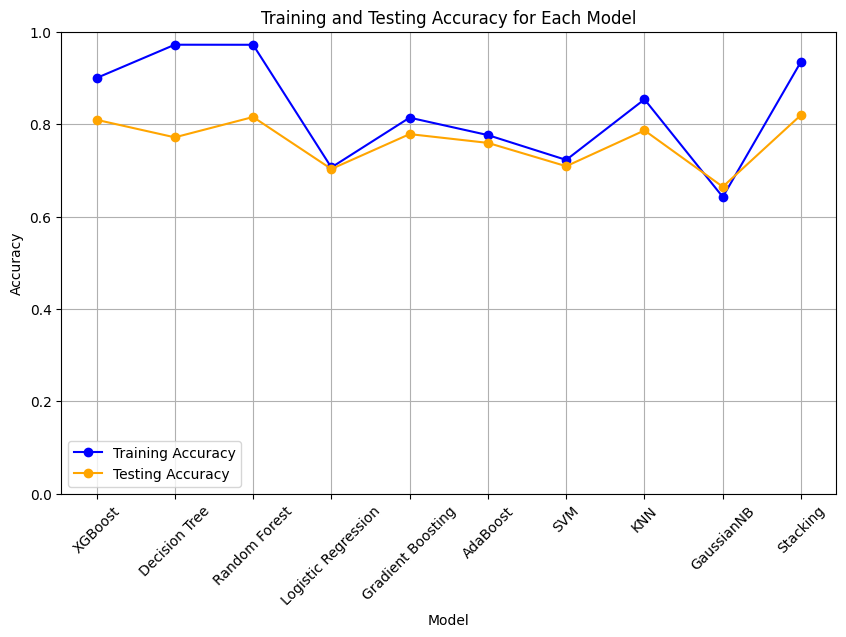

In [14]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB', 'Stacking']
train_accuracies = [xgb_model.score(X_train_scaled, y_train), dt_model.score(X_train_scaled, y_train), rf_model.score(X_train_scaled, y_train), lr_model.score(X_train_scaled, y_train), gb_model.score(X_train_scaled, y_train), ab_model.score(X_train_scaled, y_train), svm_model.score(X_train_scaled, y_train), knn_model.score(X_train_scaled, y_train), gnb_model.score(X_train_scaled, y_train), stacking_model.score(X_train_scaled, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy, stacking_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(models, test_accuracies, marker='o', linestyle='-', color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

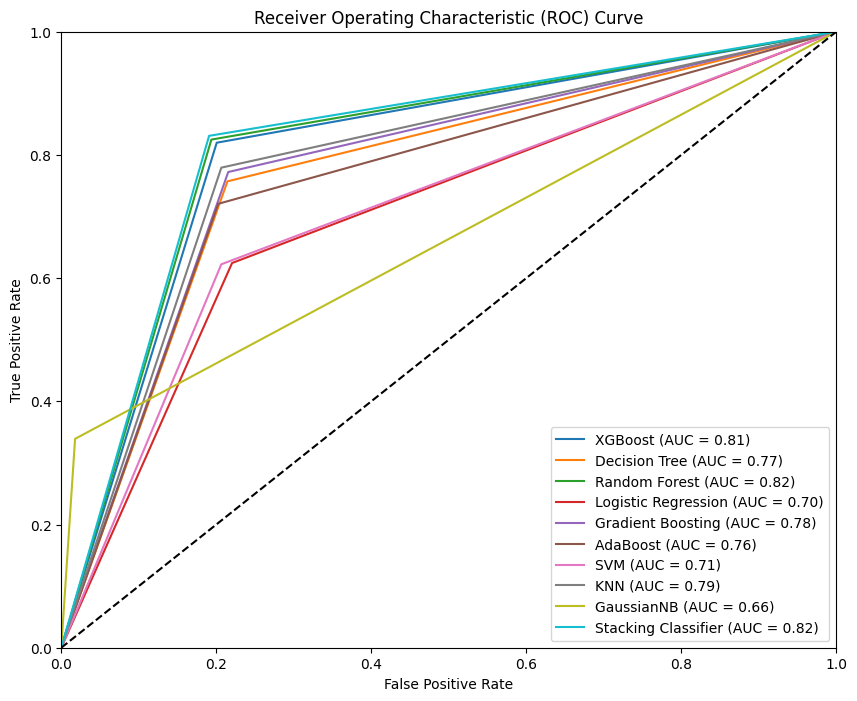

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a list of models and their corresponding predictions
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB', 'Stacking Classifier']
predictions = [xgb_pred, dt_pred, rf_pred, lr_pred, gb_pred, ab_pred, svm_pred, knn_pred, gnb_pred, stacking_pred]

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model, prediction in zip(models, predictions):
    fpr, tpr, _ = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    plt.plot(fpr, tpr, label=model + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Print confusion matrix report for each model
for model, prediction in zip(models, predictions):
    cm = confusion_matrix(y_test, prediction)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print("Model:", model)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("------------------------------")

Model: XGBoost
Confusion Matrix:
[[809 203]
 [178 810]]
Accuracy: 0.8095
Precision: 0.7996051332675223
Recall: 0.819838056680162
F1 Score: 0.8095952023988007
------------------------------
Model: Decision Tree
Confusion Matrix:
[[795 217]
 [240 748]]
Accuracy: 0.7715
Precision: 0.7751295336787565
Recall: 0.757085020242915
F1 Score: 0.7660010240655403
------------------------------
Model: Random Forest
Confusion Matrix:
[[816 196]
 [173 815]]
Accuracy: 0.8155
Precision: 0.8061325420375866
Recall: 0.8248987854251012
F1 Score: 0.815407703851926
------------------------------
Model: Logistic Regression
Confusion Matrix:
[[789 223]
 [371 617]]
Accuracy: 0.703
Precision: 0.7345238095238096
Recall: 0.6244939271255061
F1 Score: 0.675054704595186
------------------------------
Model: Gradient Boosting
Confusion Matrix:
[[794 218]
 [225 763]]
Accuracy: 0.7785
Precision: 0.7777777777777778
Recall: 0.7722672064777328
F1 Score: 0.7750126968004063
------------------------------
Model: AdaBoost
Confu

# Saving the model using Pickel library

In [17]:
import pickle

In [18]:
pickle.dump(lr_model, open('model.pkl', 'wb'))